In [1]:
!pip install pandas numpy nltk scikit-learn wordcloud seaborn gensim tensorflow imblearn xgboost matplotlib unrar pyunpack more-itertools patool > /dev/null

The system cannot find the path specified.


In [2]:
from nlp_ai_utils import *
from chunks_urls import CHUNKS_URLS
from updating_values import DATA_LIMIT
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already u

True

In [3]:
#Set this to false if you are running this on your local machine, and true if you are running this on google colab
GDRIVE = False

LOCAL_DIR = '../pickle_files/'

In [4]:
#TF_ENABLE_ONEDNN_OPTS = 0
URLS = CHUNKS_URLS
LIMIT = 60
LARGER_DATASET_PATH = "../larger_dataset"
PREPROCESSED_CHUNKS_PATH = LARGER_DATASET_PATH + "/preprocessed_data_chunks/"
BASE_FILE_NAME = "chunk_"
FILE_FORMAT = ".csv"
ACTUAL_DATA_SHAPE = 6990280
RANDOM_STATE = 42
USE_MODIFIED_LABELS = True
BALANCE_DATA = True

In [5]:
if not os.path.exists(LARGER_DATASET_PATH):
    os.mkdir(LARGER_DATASET_PATH)
if not os.path.exists(PREPROCESSED_CHUNKS_PATH):
    os.mkdir(PREPROCESSED_CHUNKS_PATH)
get_chunks(URLS,LIMIT,1,BASE_FILE_NAME,PREPROCESSED_CHUNKS_PATH,FILE_FORMAT)

chunk_1 already exists.
chunk_2 already exists.
chunk_3 already exists.
chunk_4 already exists.
chunk_5 already exists.
chunk_6 already exists.
chunk_7 already exists.
chunk_8 already exists.
chunk_9 already exists.
chunk_10 already exists.
chunk_11 already exists.
chunk_12 already exists.
chunk_13 already exists.
chunk_14 already exists.
chunk_15 already exists.
chunk_16 already exists.
chunk_17 already exists.
chunk_18 already exists.
chunk_19 already exists.
chunk_20 already exists.
chunk_21 already exists.
chunk_22 already exists.
chunk_23 already exists.
chunk_24 already exists.
chunk_25 already exists.
chunk_26 already exists.
chunk_27 already exists.
chunk_28 already exists.
chunk_29 already exists.
chunk_30 already exists.
chunk_31 already exists.
chunk_32 already exists.
chunk_33 already exists.
chunk_34 already exists.
chunk_35 already exists.
chunk_36 already exists.
chunk_37 already exists.
chunk_38 already exists.
chunk_39 already exists.
chunk_40 already exists.
chunk_41 

In [6]:
#get all names of downloaded files
all_file_names = get_all_file_names(BASE_FILE_NAME,LIMIT)

In [7]:
#read all chunks into a list
list_dfs = read_chunks(all_file_names,PREPROCESSED_CHUNKS_PATH,FILE_FORMAT)

In [8]:
#concatenate all chunks into a singular df
df = group_up_chunks(list_dfs)

In [9]:
review_data = df[['text', 'stars']].copy()

In [10]:
review_data.reset_index(inplace = True)
review_data.drop(['index'],axis = 1,inplace = True)

In [11]:
review_data.rename(columns = {'text':'full_review_text','stars':'star_rating'}, inplace = True)

In [12]:
review_data['full_review_text'] = pd.Series([str(text) for text in review_data['full_review_text']])

In [13]:
review_data.isnull().sum()
review_data.dropna(inplace = True)

In [14]:
review_data['full_review_text'].replace('', np.nan, inplace=True)
review_data.dropna(inplace = True)

In [15]:
len(review_data['full_review_text'])

6990280

### Data Balancing

In [16]:
if BALANCE_DATA:
    if not USE_MODIFIED_LABELS:
        label_1 = review_data[review_data['star_rating'] == 1]
        label_2 = review_data[review_data['star_rating'] == 2]
        label_3 = review_data[review_data['star_rating'] == 3]
        label_4 = review_data[review_data['star_rating'] == 4]
        label_5 = review_data[review_data['star_rating'] == 5]

        minority_class = min([label_1.shape[0],label_2.shape[0],label_3.shape[0],label_4.shape[0],label_5.shape[0]])
    else:
        label_1 = review_data[review_data['star_rating'] == 1]
        label_2 = review_data[review_data['star_rating'] == 2]
        label_3 = review_data[review_data['star_rating'] == 3]
        label_4 = review_data[review_data['star_rating'] == 4]
        label_5 = review_data[review_data['star_rating'] == 5]

        minority_class = label_3.shape[0] / 2

In [17]:
if BALANCE_DATA:
    if USE_MODIFIED_LABELS:
        review_data_label_1 = label_1[:int(minority_class)]
        review_data_label_2 = label_2[:int(minority_class)]
        review_data_label_3 = label_3
        review_data_label_4 = label_4[:int(minority_class)]
        review_data_label_5 = label_5[:int(minority_class)]

    else:
        review_data_label_1 = label_1[:int(minority_class)]
        review_data_label_2 = label_2[:int(minority_class)]
        review_data_label_3 = label_3[:int(minority_class)]
        review_data_label_4 = label_4[:int(minority_class)]
        review_data_label_5 = label_5[:int(minority_class)]

    review_data = pd.concat([review_data_label_1,review_data_label_2,review_data_label_3,review_data_label_4,review_data_label_5])

    print(review_data.shape)

    print(review_data['star_rating'].value_counts())

(2075802, 2)
3.0    691934
1.0    345967
2.0    345967
4.0    345967
5.0    345967
Name: star_rating, dtype: int64


In [18]:
if BALANCE_DATA:
    review_data = review_data.sample(frac=1,random_state=RANDOM_STATE)
    review_data.reset_index(drop=True,inplace=True)

In [19]:
X = review_data['full_review_text']
y = review_data['star_rating']

## Comparisons

### Sentiment Polarity

In [20]:
if GDRIVE:
  if os.path.exists("sent_data.pickle"):
      sent_data = pickle.load(open("sent_data.pickle",'rb'))
  else:
      sid = SentimentIntensityAnalyzer()
      sent_polarity_info = [sid.polarity_scores(review) for review in review_data['full_review_text']]
else:
  if os.path.exists(LOCAL_DIR + "sent_data.pickle"):
      sent_data = pickle.load(open(LOCAL_DIR + "sent_data.pickle",'rb'))
  else:
      sid = SentimentIntensityAnalyzer()
      sent_polarity_info = [sid.polarity_scores(review) for review in review_data['full_review_text']]

In [21]:
if GDRIVE:
  if not os.path.exists("sent_data.pickle"):
      review_sentiment = [classify_sentiment(scores) for scores in sent_polarity_info]
      sent_polarity = [extract_sent_polarity(scores) for scores in sent_polarity_info]
      review_data['str_sent'] = review_sentiment
      review_data['sent_polarity'] = sent_polarity
      sentiment_labels = translate_labels(y)
      y_true_sent = encode_sent(sentiment_labels)
      y_pred_sent = encode_sent(review_data['str_sent'])
else:
  if not os.path.exists("../pickle_files/sent_data.pickle"):
    review_sentiment = [classify_sentiment(scores) for scores in sent_polarity_info]
    sent_polarity = [extract_sent_polarity(scores) for scores in sent_polarity_info]
    review_data['str_sent'] = review_sentiment
    review_data['sent_polarity'] = sent_polarity
    sentiment_labels = translate_labels(y)
    y_true_sent = encode_sent(sentiment_labels)
    y_pred_sent = encode_sent(review_data['str_sent'])

In [22]:
if GDRIVE:
  if not os.path.exists("sent_data.pickle"):
      sent_data = review_data[['str_sent', 'sent_polarity']].copy()
      pickle_out = open("sent_data.pickle",'wb')
      pickle.dump(sent_data,pickle_out)
      pickle_out.close()
else:
  if not os.path.exists("../pickle_files/sent_data.pickle"):
    sent_data = review_data[['str_sent', 'sent_polarity']].copy()
    pickle_out = open("../pickle_files/sent_data.pickle",'wb')
    pickle.dump(sent_data,pickle_out)
    pickle_out.close() 

In [23]:
if GDRIVE:
  if not os.path.exists("sent_data.pickle"):
      print(metrics.accuracy_score(y_true_sent,y_pred_sent))
else:
  if not os.path.exists("../pickle_files/sent_data.pickle"):
    print(metrics.accuracy_score(y_true_sent,y_pred_sent))

In [24]:
sentiment_labels = translate_labels(y)
y_true_sent = encode_sent(sentiment_labels)
y_pred_sent = encode_sent(sent_data['str_sent'])
print(metrics.accuracy_score(y_true_sent,y_pred_sent))

0.44632917783102627


### Machine Learning Models

#### Word Embedding

In [25]:
if GDRIVE:
  if not os.path.exists('pickle_files'):
      os.mkdir('pickle_files')
else:
  if not os.path.exists('../pickle_files'):
    os.mkdir('../pickle_files')

In [26]:
count_model = CountVectorizer()

In [27]:
if GDRIVE:
  if not os.path.exists("pickle_files/word2vec_model_sklearn.pickle"):
      print("Creating Embedding From Scratch.")
      word2vec_model_sklearn = count_model.fit_transform(X.apply(lambda x: np.str_(x)))
      pickle_out = open("pickle_files/word2vec_model_sklearn.pickle",'wb')
      pickle.dump(word2vec_model_sklearn,pickle_out)
      pickle_out.close()
  else:
      print("Found Pickle File.")
      word2vec_model_sklearn = pickle.load(open("pickle_files/word2vec_model_sklearn.pickle",'rb'))
else:
  if not os.path.exists("../pickle_files/word2vec_model_sklearn.pickle"):
      print("Creating Embedding From Scratch.")
      word2vec_model_sklearn = count_model.fit_transform(X.apply(lambda x: np.str_(x)))
      pickle_out = open("../pickle_files/word2vec_model_sklearn.pickle",'wb')
      pickle.dump(word2vec_model_sklearn,pickle_out)
      pickle_out.close()
  else:
      print("Found Pickle File.")
      word2vec_model_sklearn = pickle.load(open("../pickle_files/word2vec_model_sklearn.pickle",'rb'))

Found Pickle File.


In [28]:
#word2vec_model_sklearn_array = word2vec_model_sklearn.toarray()

In [29]:
x_train,x_test,y_train,y_test = create_train_test_split(word2vec_model_sklearn,y_true_sent,test_size=0.2)

#### Data Resampling

In [30]:
if GDRIVE:
  if not os.path.exists("pickle_files/smote_x_y_train.pickle"):
      random_undersampler = RandomUnderSampler(random_state=RANDOM_STATE)
      x_train,y_train = random_undersampler.fit_resample(x_train,y_train)
else:
  if not os.path.exists("../pickle_files/smote_x_y_train.pickle"):
      random_undersampler = RandomUnderSampler(random_state=RANDOM_STATE)
      x_train,y_train = random_undersampler.fit_resample(x_train,y_train)

In [31]:
if GDRIVE:
  if not os.path.exists("pickle_files/smote_x_y_train.pickle"):
      pickle_out = open("pickle_files/smote_x_y_train.pickle",'wb')
      pickle.dump({'x_train':x_train,'y_train':y_train},pickle_out)
      pickle_out.close()
else:
  if not os.path.exists("../pickle_files/smote_x_y_train.pickle"):
      pickle_out = open("../pickle_files/smote_x_y_train.pickle",'wb')
      pickle.dump({'x_train':x_train,'y_train':y_train},pickle_out)
      pickle_out.close()

#### Training and Results

In [32]:
rf_clf = RandomForestClassifier(n_estimators=25,random_state=RANDOM_STATE)
lr_clf = LogisticRegression(random_state=RANDOM_STATE)
bag_mnnb_clf = BaggingClassifier(base_estimator = MultinomialNB(),n_estimators=25,random_state = RANDOM_STATE)
xgb_clf = XGBClassifier(random_state = RANDOM_STATE)

In [33]:
y_train_xgb,y_test_xgb = adjust_xgb_labels(y_train,y_test)

In [34]:
if GDRIVE:
  if not os.path.exists('pickle_files/rf.pickle'):
    rf_clf.fit(x_train,y_train)
    y_pred_rf = rf_clf.predict(x_test)
    pickle_out = open("pickle_files/rf.pickle",'wb')
    pickle.dump({'rf_clf':rf_clf,'rf_pred':y_pred_rf},pickle_out)
    pickle_out.close()

  if not os.path.exists('pickle_files/lr.pickle'):
    lr_clf.fit(x_train,y_train)
    y_pred_lr = lr_clf.predict(x_test)
    pickle_out = open("pickle_files/lr.pickle",'wb')
    pickle.dump({'lr_clf':lr_clf,'lr_pred':y_pred_lr},pickle_out)
    pickle_out.close()

  if not os.path.exists('pickle_files/bag_mnnb.pickle'):
    bag_mnnb_clf.fit(x_train,y_train)
    y_pred_mnnb = bag_mnnb_clf.predict(x_test)
    pickle_out = open("pickle_files/bag_mnnb.pickle",'wb')
    pickle.dump({'bag_mnnb_clf':bag_mnnb_clf,'y_pred_mnnb':y_pred_mnnb},pickle_out)
    pickle_out.close()

  if not os.path.exists('pickle_files/xgb.pickle'):
    xgb_clf.fit(x_train,y_train_xgb)
    y_pred_xgb = xgb_clf.predict(x_test)
    pickle_out = open("pickle_files/xgb.pickle",'wb')
    pickle.dump({'xgb_clf':xgb_clf,'xgb_pred':y_pred_xgb},pickle_out)
    pickle_out.close()
else:
  if not os.path.exists('../pickle_files/rf.pickle'):
    rf_clf.fit(x_train,y_train)
    y_pred_rf = rf_clf.predict(x_test)
    pickle_out = open("../pickle_files/rf.pickle",'wb')
    pickle.dump({'rf_clf':rf_clf,'rf_pred':y_pred_rf},pickle_out)
    pickle_out.close()

  if not os.path.exists('../pickle_files/lr.pickle'):
    lr_clf.fit(x_train,y_train)
    y_pred_lr = lr_clf.predict(x_test)
    pickle_out = open("../pickle_files/lr.pickle",'wb')
    pickle.dump({'lr_clf':lr_clf,'lr_pred':y_pred_lr},pickle_out)
    pickle_out.close()

  if not os.path.exists('../pickle_files/bag_mnnb.pickle'):
    bag_mnnb_clf.fit(x_train,y_train)
    y_pred_mnnb = bag_mnnb_clf.predict(x_test)
    pickle_out = open("../pickle_files/bag_mnnb.pickle",'wb')
    pickle.dump({'bag_mnnb_clf':bag_mnnb_clf,'y_pred_mnnb':y_pred_mnnb},pickle_out)
    pickle_out.close()

  if not os.path.exists('../pickle_files/xgb.pickle'):
    xgb_clf.fit(x_train,y_train_xgb)
    y_pred_xgb = xgb_clf.predict(x_test)
    pickle_out = open("../pickle_files/xgb.pickle",'wb')
    pickle.dump({'xgb_clf':xgb_clf,'xgb_pred':y_pred_xgb},pickle_out)
    pickle_out.close() 

In [35]:
if os.path.exists("../pickle_files/rf.pickle"):
    print("Found RF Pickle File!")
    rf_info = pickle.load(open('../pickle_files/rf.pickle','rb'))
    rf_clf = rf_info['rf_clf']
    y_pred_rf = rf_info['rf_pred']
if os.path.exists("../pickle_files/lr.pickle"):
    print("Found LR Pickle File!")
    lr_info = pickle.load(open('../pickle_files/lr.pickle','rb'))
    lr_clf = lr_info['lr_clf']
    y_pred_lr = lr_info['lr_pred']
if os.path.exists("../pickle_files/bag_mnnb.pickle"):
    print("Found Bag_mnnb Pickle File!")
    bag_mnnb_info = pickle.load(open('../pickle_files/bag_mnnb.pickle','rb'))
    bag_mnnb_clf = bag_mnnb_info['bag_mnnb_clf']
    y_pred_mnnb = bag_mnnb_info['y_pred_mnnb']
if os.path.exists("../pickle_files/xgb.pickle"):
    print("Found xgb Pickle File!")
    xgb_info = pickle.load(open('../pickle_files/xgb.pickle','rb'))
    xgb_clf = xgb_info['xgb_clf']
    y_pred_xgb = xgb_info['xgb_pred'] 

Found RF Pickle File!
Found LR Pickle File!
Found Bag_mnnb Pickle File!
Found xgb Pickle File!


In [36]:
print(f"RF: {metrics.accuracy_score(y_test,y_pred_rf)}")
print(f"LR: {metrics.accuracy_score(y_test,y_pred_lr)}")
print(f"MNNB: {metrics.accuracy_score(y_test,y_pred_mnnb)}")
print(f"XGB: {metrics.accuracy_score(y_test_xgb,y_pred_xgb)}")

RF: 0.5143402198183356
LR: 0.6961154829090401
MNNB: 0.6274240595817044
XGB: 0.7099245834748447


PRINTING METRIC(S) FOR rf
Classification Report = 
                precision    recall  f1-score   support

           1       0.52      0.57      0.54    138387
           2       0.56      0.61      0.58    138387
           3       0.45      0.36      0.40    138387

    accuracy                           0.51    415161
   macro avg       0.51      0.51      0.51    415161
weighted avg       0.51      0.51      0.51    415161

PRINTING METRIC(S) FOR lr


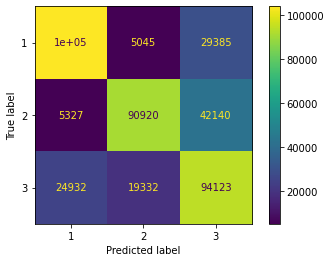

Classification Report = 
                precision    recall  f1-score   support

           1       0.77      0.75      0.76    138387
           2       0.79      0.66      0.72    138387
           3       0.57      0.68      0.62    138387

    accuracy                           0.70    415161
   macro avg       0.71      0.70      0.70    415161
weighted avg       0.71      0.70      0.70    415161

PRINTING METRIC(S) FOR bag_mnnb


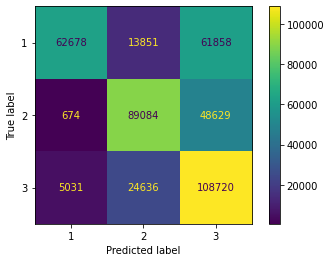

Classification Report = 
                precision    recall  f1-score   support

           1       0.92      0.45      0.61    138387
           2       0.70      0.64      0.67    138387
           3       0.50      0.79      0.61    138387

    accuracy                           0.63    415161
   macro avg       0.70      0.63      0.63    415161
weighted avg       0.70      0.63      0.63    415161

PRINTING METRIC(S) FOR xgb


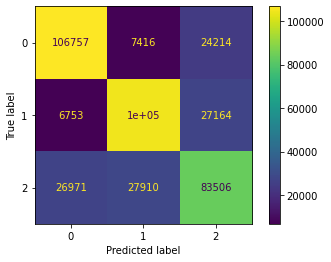

Classification Report = 
                precision    recall  f1-score   support

           0       0.76      0.77      0.77    138387
           1       0.75      0.75      0.75    138387
           2       0.62      0.60      0.61    138387

    accuracy                           0.71    415161
   macro avg       0.71      0.71      0.71    415161
weighted avg       0.71      0.71      0.71    415161



In [37]:
show_metrics('rf',rf_clf,x_test,y_test,y_pred_rf,x_train,y_train,5,False,False,True,False)
show_metrics('lr',lr_clf,x_test,y_test,y_pred_lr,x_train,y_train,5,True,False,True,False)
show_metrics('bag_mnnb',bag_mnnb_clf,x_test,y_test,y_pred_mnnb,x_train,y_train,5,True,False,True,False)
show_metrics('xgb',xgb_clf,x_test,y_test_xgb,y_pred_xgb,x_train,y_train_xgb,5,True,False,True,False)